In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn import svm
#import graphviz 
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.optimize import fmin_tnc
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Изучение качества классификации

**Решение задачи классификации - это предсказание значений качественного (категориального) признака.**

### Подготовка данных и построение базовых моделей для оценки качества

Будем использовать набор данных про вина.

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#wine-dataset
wine = load_wine()

In [3]:
# Наименования признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# Значения признаков
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [5]:
type(wine.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(wine.target)

array([0, 1, 2])

In [7]:
# Наименования значений целевого признака
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [9]:
# Значения целевого признака
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [11]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [12]:
# И выведем его статистические характеристики
wine_df.describe()

# Для обучения моделей не обязательно создавать DataFrame
# можно использовать массивы numpy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Разделение выборки на обучающую и тестовую

Для разделения выборки на обучающую и тестовую используется функция [train_test_split.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [13]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=10)

Как правило, параметр test_size устанавливают в 20% или 30%. 

Параметр random_state позволяет задавать базовое значение для генератора случайных чисел. Это делает разбиение неслучайным. Если задается параметр random_state то результаты разбиения будут одинаковыми при различных запусках. На практике этот параметр удобно использовать для создания "устойчивых" учебных примеров, которые выдают одинаковый результат при различных запусках.

In [14]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((124, 13), (124,))

In [15]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((54, 13), (54,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

In [16]:
np.unique(wine_y_train)

array([0, 1, 2])

In [17]:
np.unique(wine_y_test)

array([0, 1, 2])

In [18]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(wine.target)

# Функция train_test_split разделила исходную выборку таким образом, 
# чтобы в обучающей и тестовой частях сохранились пропорции классов.

Метка 	 Количество 	 Процент встречаемости
0 	 59 	 	 33.15%
1 	 71 	 	 39.89%
2 	 48 	 	 26.97%


In [20]:
# Для обучающей выборки
print_class_proportions(wine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 44 	 	 35.48%
1 	 44 	 	 35.48%
2 	 36 	 	 29.03%


In [21]:
# Для тестовой выборки
print_class_proportions(wine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 15 	 	 27.78%
1 	 27 	 	 50.0%
2 	 12 	 	 22.22%


#### Построим модель используя линейную регрессию

In [22]:
df_X = pd.DataFrame(wine_X_train,columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])
df_y = pd.DataFrame(wine_y_train, columns=['target'])
wine_train_df = pd.concat([df_X, df_y], axis=1)

<Axes: >

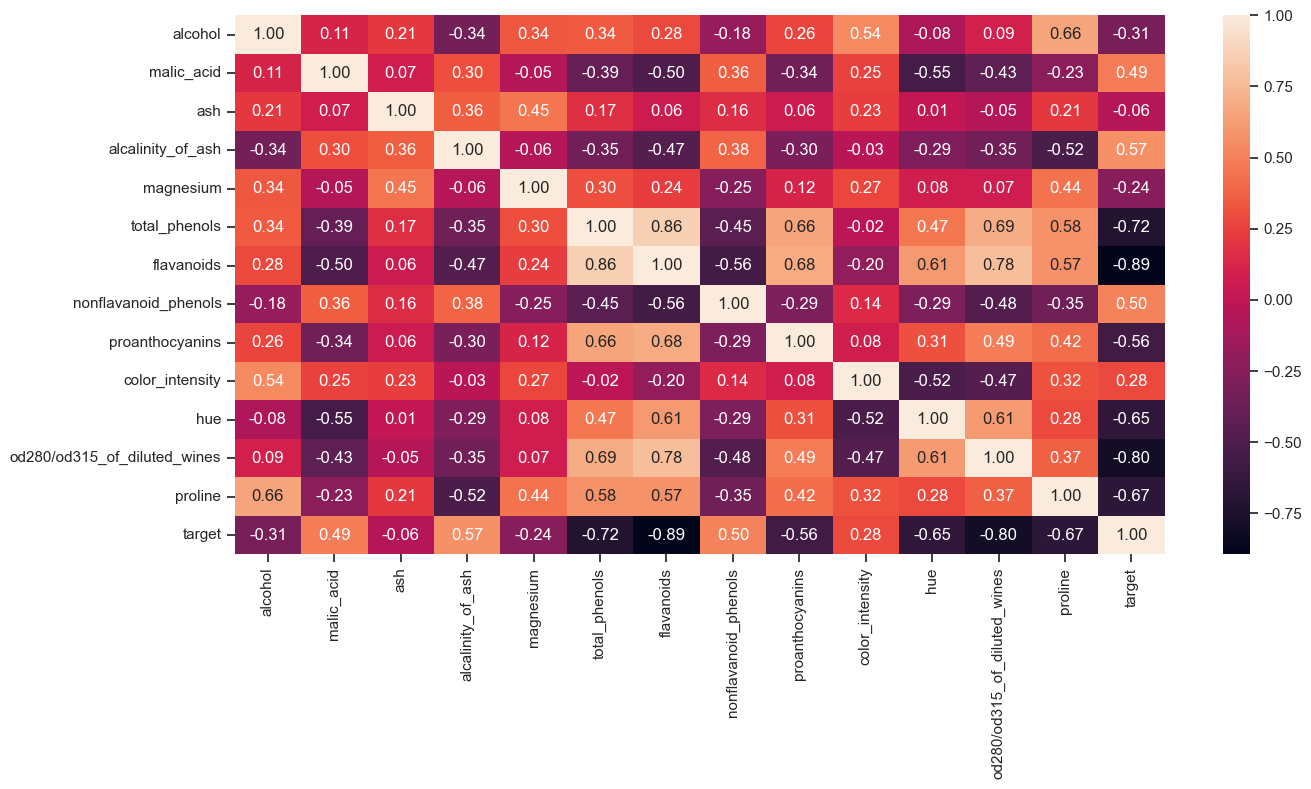

In [23]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(wine_train_df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

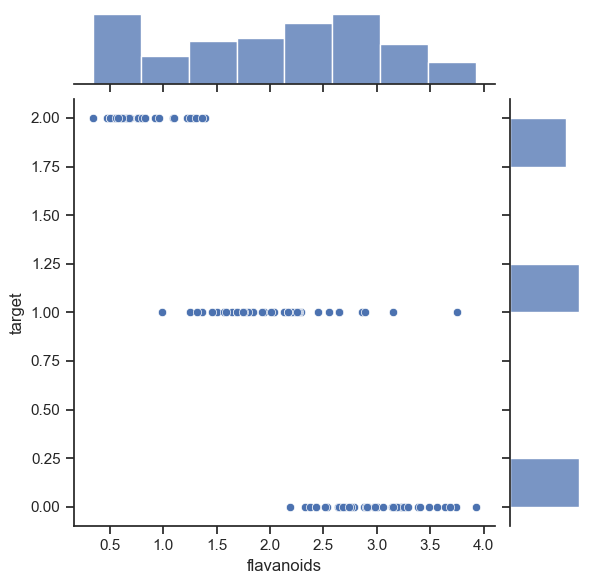

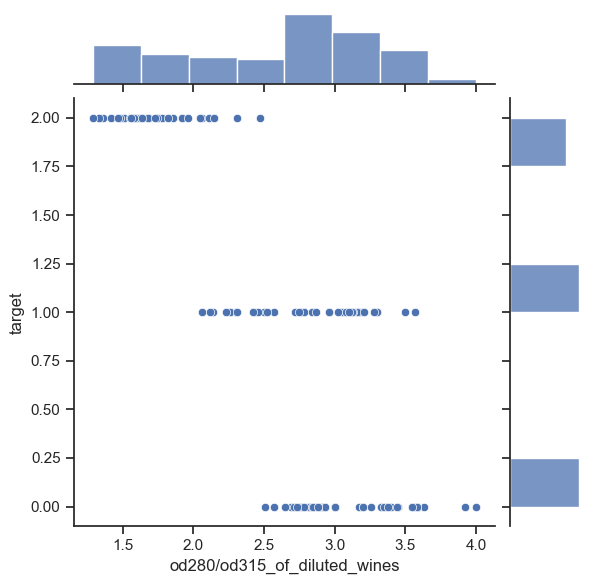

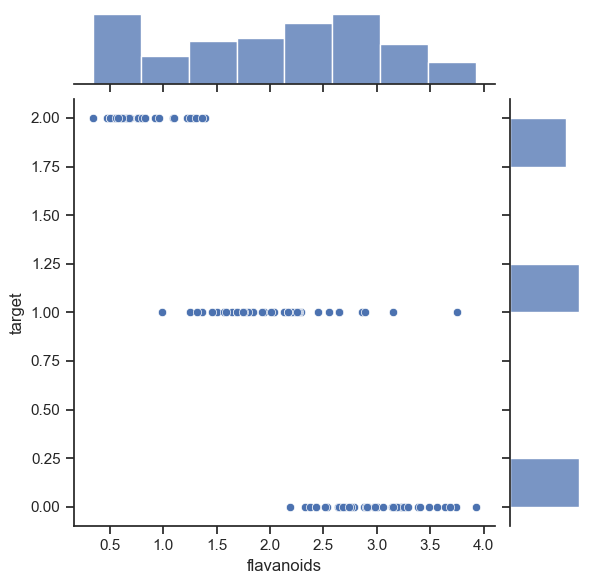

In [24]:
sns.jointplot(x='flavanoids', y='target', data=wine_train_df)
sns.jointplot(x='od280/od315_of_diluted_wines', y='target', data=wine_train_df)
sns.jointplot(x='flavanoids', y='target', data=wine_train_df)

возьмем признак flavanoids с коэфициентом кореляции -0,89 и признак od280/od315_of_diluted_wines с коэфициентом кореляции -0,8

In [25]:
wine_X_train_lr = df_X[[df_X.columns[6], df_X.columns[11]]]
wine_train_df_lr = pd.concat([wine_X_train_lr, df_y], axis=1)
wine_train_df_lr['x0'] = 1
wine_train_df_lr.head()

,flavanoids,od280/od315_of_diluted_wines,target,x0
0,0.75,1.56,2,1
1,1.58,2.72,1,1
2,3.24,3.17,0,1
3,2.29,3.19,1,1
4,0.83,1.51,2,1


In [26]:
wine_train_df_lr_1 = wine_train_df_lr
wine_train_df_lr_2 = wine_train_df_lr
wine_train_df_lr_0 = wine_train_df_lr

In [27]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [28]:
bin_wine_y_train_0 = convert_target_to_binary(df_y.target, 0)
bin_wine_y_train_1 = convert_target_to_binary(df_y.target, 1)
bin_wine_y_train_2 = convert_target_to_binary(df_y.target, 2)

In [29]:
wine_train_df_lr_1['target_bin'] = bin_wine_y_train_1
wine_train_df_lr_1.head()

,flavanoids,od280/od315_of_diluted_wines,target,x0,target_bin
0,0.75,1.56,2,1,0
1,1.58,2.72,1,1,1
2,3.24,3.17,0,1,0
3,2.29,3.19,1,1,1
4,0.83,1.51,2,1,0


C:\Users\User\AppData\Local\Temp\ipykernel_11160\579575517.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


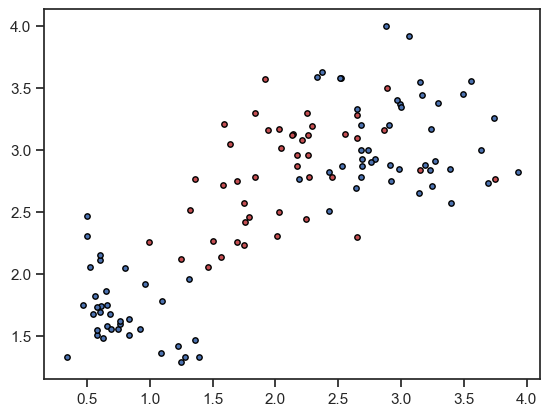

In [30]:
# Визуализация данных
colors = "br"
X_viz = wine_train_df_lr_1[['flavanoids', 'od280/od315_of_diluted_wines']].values
y_viz = wine_train_df_lr_1['target_bin'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()  

In [31]:
wine_train_df_lr_2['target_bin'] = bin_wine_y_train_2
wine_train_df_lr_2.head()

,flavanoids,od280/od315_of_diluted_wines,target,x0,target_bin
0,0.75,1.56,2,1,1
1,1.58,2.72,1,1,0
2,3.24,3.17,0,1,0
3,2.29,3.19,1,1,0
4,0.83,1.51,2,1,1


C:\Users\User\AppData\Local\Temp\ipykernel_11160\277426232.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


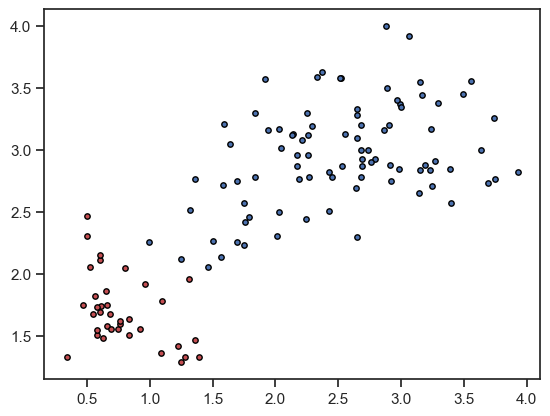

In [32]:
# Визуализация данных
colors = "br"
X_viz = wine_train_df_lr_2[['flavanoids', 'od280/od315_of_diluted_wines']].values
y_viz = wine_train_df_lr_2['target_bin'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()  

In [33]:
wine_train_df_lr_0['target_bin'] = bin_wine_y_train_0
wine_train_df_lr_0.head()

,flavanoids,od280/od315_of_diluted_wines,target,x0,target_bin
0,0.75,1.56,2,1,0
1,1.58,2.72,1,1,0
2,3.24,3.17,0,1,1
3,2.29,3.19,1,1,0
4,0.83,1.51,2,1,0


C:\Users\User\AppData\Local\Temp\ipykernel_11160\3070988161.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


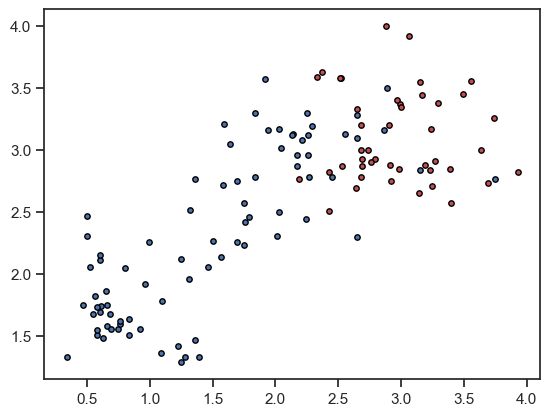

In [34]:
# Визуализация данных
colors = "br"
X_viz = wine_train_df_lr_0[['flavanoids', 'od280/od315_of_diluted_wines']].values
y_viz = wine_train_df_lr_0['target_bin'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()  

In [35]:
# Реализация градиентного спуска
def sigmoid(x):
    '''
    Функция - сигмоида
    '''
    return 1 / (1 + np.exp(-x))

def proba(b, x):
    '''
    Вероятность единичного класса
    '''
    return sigmoid(np.dot(x,b))

def cost_function(b, x, y):
    '''
    Функция потерь
    '''
    k = x.shape[0]
    res = -(1 / k) * np.sum(
        y * np.log(proba(b, x)) 
        + (1 - y) * np.log(1 - proba(b, x)))
    return res

def gradient(b, x, y):
    '''
    Определение градиента
    '''
    k = x.shape[0]
    res = (1 / k) * np.dot(
        x.T, (proba(b, x) - y))

def optimize_lr(x, y, b):
    '''
    Для оптимизации используется функция 
    scipy.optimize.fmin_tnc
    '''
    opt_weights = fmin_tnc(
        func=cost_function, 
        x0=b,          
        fprime=gradient,
        approx_grad=True,
        args=(x, y))
    return opt_weights[0]    

In [36]:
opt_x = wine_train_df_lr[['x0','flavanoids', 'od280/od315_of_diluted_wines']].values
opt_x[:5]

array([[1.  , 0.75, 1.56],
       [1.  , 1.58, 2.72],
       [1.  , 3.24, 3.17],
       [1.  , 2.29, 3.19],
       [1.  , 0.83, 1.51]])

In [37]:
opt_y =  wine_train_df_lr['target_bin']
opt_y[:5]

0    0
1    0
2    1
3    0
4    0
Name: target_bin, dtype: int64

In [38]:
b_init = np.zeros(3)
b_init

array([0., 0., 0.])

In [39]:
b_res = optimize_lr(opt_x, opt_y, b_init)
b_res

array([-13.18607259,   3.8603837 ,   1.13951933])

In [40]:
def vis_lr(b):
    '''
    Визуализация результата
    '''    
    colors = "gb"
    X_viz = wine_train_df_lr[['flavanoids', 'od280/od315_of_diluted_wines']].values
    y_viz = wine_train_df_lr['target_bin'].values
    n_classes = len(np.unique(y_viz))
    for i, color in zip(range(n_classes), colors):
        idx = np.where(y_viz == i)
        plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                    c=color, 
                    cmap=plt.cm.RdYlBu, 
                    edgecolor='black', s=15)

    t1 = wine_train_df_lr['flavanoids'].values    
    t2 = -((b[0]+np.dot(b[1], t1))/b[2])
    plt.plot(t1, t2, 'r', linewidth=2.0)   
    plt.show()    

C:\Users\User\AppData\Local\Temp\ipykernel_11160\1668721339.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


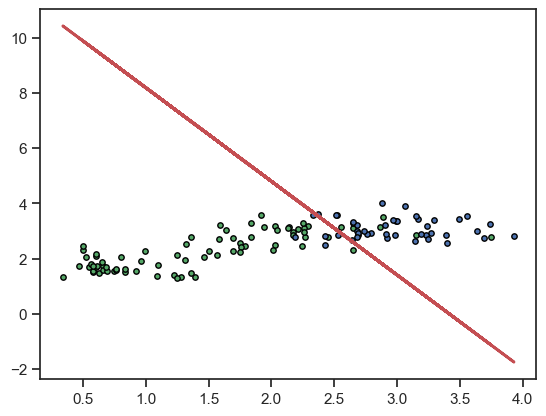

In [41]:
vis_lr(b_res)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
#wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
#    wine_x_ds_lr[['petal length (cm)', 'sepal length (cm)']].values, 
#    wine_x_ds_lr['target_bin'].values, test_size=0.5, random_state=1)

In [44]:
wine_X_train_lr = wine_X_train[:, [6, 11]]
wine_X_test_lr = wine_X_test[:, [6, 11]]
wine_y_train_lr_0 = convert_target_to_binary(wine_y_train, 0)
wine_y_test_lr_0 = convert_target_to_binary(wine_y_test, 0)

In [45]:
cl1 = LogisticRegression()

In [46]:
cl1.fit(wine_X_train_lr, wine_y_train_lr_0)

LogisticRegression()

In [47]:
pred_wine_y_test_lr_0 = cl1.predict(wine_X_test_lr)
pred_wine_y_test_lr_0

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [48]:
pred_wine_y_test_lr_proba_0 = cl1.predict_proba(wine_X_test_lr)
pred_wine_y_test_lr_proba_0[:10]

array([[0.96303728, 0.03696272],
       [0.94350486, 0.05649514],
       [0.09164378, 0.90835622],
       [0.89990598, 0.10009402],
       [0.18020983, 0.81979017],
       [0.56981803, 0.43018197],
       [0.76733197, 0.23266803],
       [0.14175049, 0.85824951],
       [0.99730439, 0.00269561],
       [0.09511319, 0.90488681]])

In [49]:
# Вероятность принадлежности к 0 классу
[round(x, 4) for x in pred_wine_y_test_lr_proba_0[:10,0]]

[0.963, 0.9435, 0.0916, 0.8999, 0.1802, 0.5698, 0.7673, 0.1418, 0.9973, 0.0951]

In [50]:
# Вероятность принадлежности к 1 классу
[round(x, 4) for x in pred_wine_y_test_lr_proba_0[:10,1]]

[0.037, 0.0565, 0.9084, 0.1001, 0.8198, 0.4302, 0.2327, 0.8582, 0.0027, 0.9049]

In [51]:
# Сумма вероятностей равна 1
pred_wine_y_test_lr_proba_0[:10,0] + pred_wine_y_test_lr_proba_0[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
accuracy_score(wine_y_test_lr_0, pred_wine_y_test_lr_0)

0.8518518518518519

In [53]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [54]:
print_accuracy_score_for_classes(wine_y_test_lr_0, pred_wine_y_test_lr_0)

Метка 	 Accuracy
0 	 0.7948717948717948
1 	 1.0


Для 0 класса. Теперь сделаем то же самое для других классов

In [55]:
wine_y_train_lr_1 = convert_target_to_binary(wine_y_train, 1)
wine_y_test_lr_1 = convert_target_to_binary(wine_y_test, 1)

In [56]:
cl2 = LogisticRegression()

In [57]:
cl2.fit(wine_X_train_lr, wine_y_train_lr_1)

LogisticRegression()

In [58]:
pred_wine_y_test_lr_1 = cl2.predict(wine_X_test_lr)
pred_wine_y_test_lr_1

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [59]:
accuracy_score(wine_y_test_lr_1, pred_wine_y_test_lr_1)

0.5555555555555556

In [60]:
print_accuracy_score_for_classes(wine_y_test_lr_1, pred_wine_y_test_lr_1)

Метка 	 Accuracy
0 	 0.8888888888888888
1 	 0.2222222222222222


In [61]:
wine_y_train_lr_2 = convert_target_to_binary(wine_y_train, 2)
wine_y_test_lr_2 = convert_target_to_binary(wine_y_test, 2)

In [62]:
cl3 = LogisticRegression()

In [63]:
cl3.fit(wine_X_train_lr, wine_y_train_lr_2)

LogisticRegression()

In [64]:
pred_wine_y_test_lr_2 = cl3.predict(wine_X_test_lr)
pred_wine_y_test_lr_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [65]:
accuracy_score(wine_y_test_lr_2, pred_wine_y_test_lr_2)

0.9074074074074074

In [66]:
print_accuracy_score_for_classes(wine_y_test_lr_2, pred_wine_y_test_lr_2)

Метка 	 Accuracy
0 	 0.8809523809523809
1 	 1.0


## SVM

In [67]:
wine_X_train_svm = wine_X_train[:, [6, 11]]
wine_X_test_svm = wine_X_test[:, [6, 11]]
wine_y_train_svm = wine_y_train
wine_y_test_svm = wine_y_test

In [68]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_X_train_svm, wine_y_train_svm)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_X_train_svm[:, 0], wine_X_train_svm[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y_train_svm, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


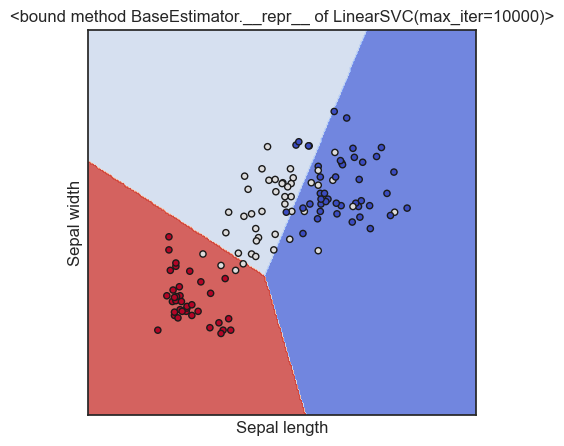

In [69]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

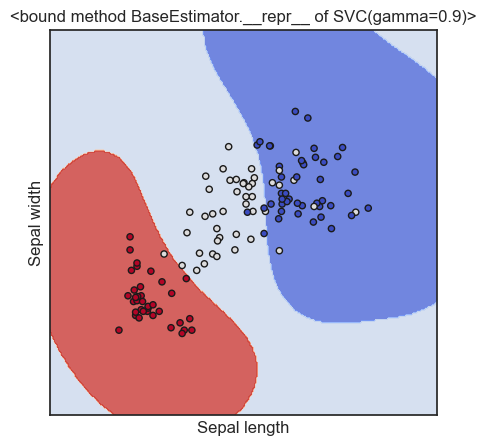

In [70]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

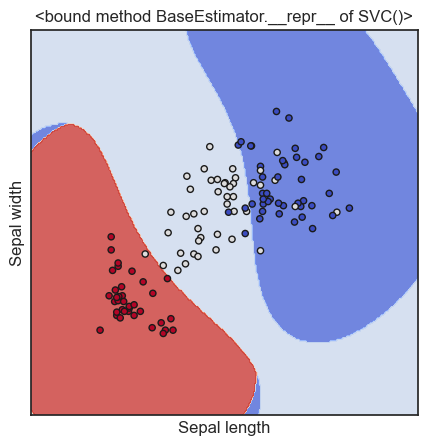

In [71]:
plot_cl(SVC(kernel='rbf'))

In [72]:
svс_1 = SVC()
svс_1.fit(wine_X_train_svm, wine_y_train_svm)

SVC()

In [73]:
pred_wine_y_test_svm = svс_1.predict(wine_X_test_svm)
pred_wine_y_test_svm

array([1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 2, 0])

In [74]:
print_accuracy_score_for_classes(wine_y_test_svm, pred_wine_y_test_svm)

Метка 	 Accuracy
0 	 1.0
1 	 0.48148148148148145
2 	 1.0


## Дерево решений

In [75]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


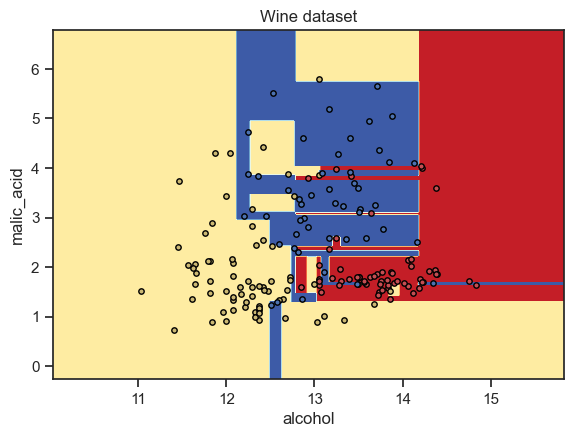

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


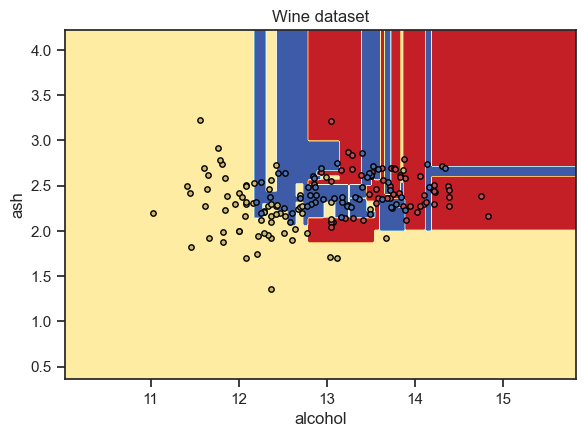

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


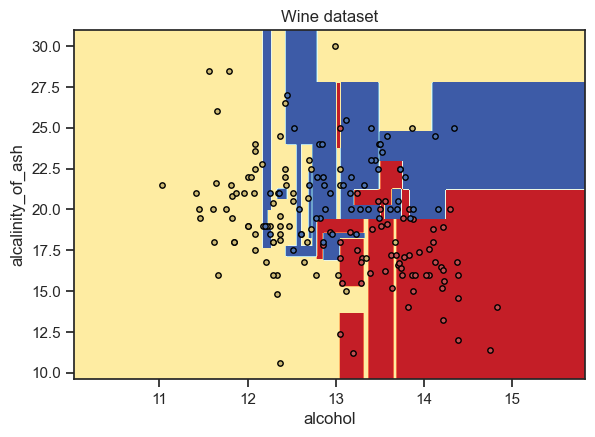

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


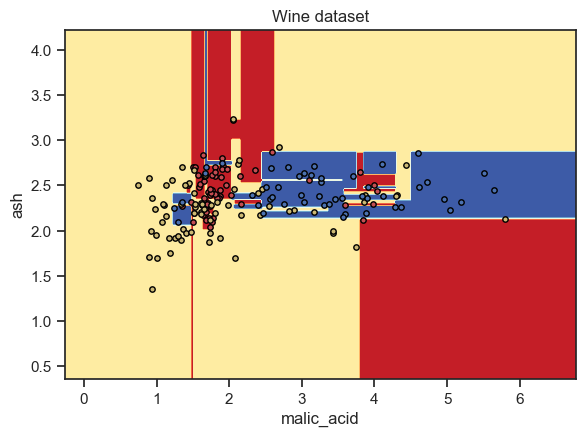

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


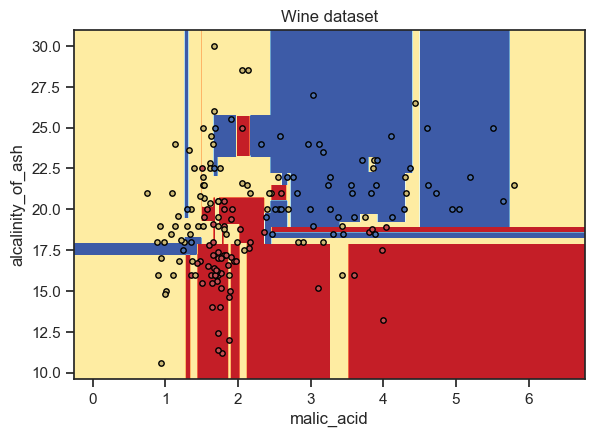

C:\Users\User\AppData\Local\Temp\ipykernel_11160\4013090555.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


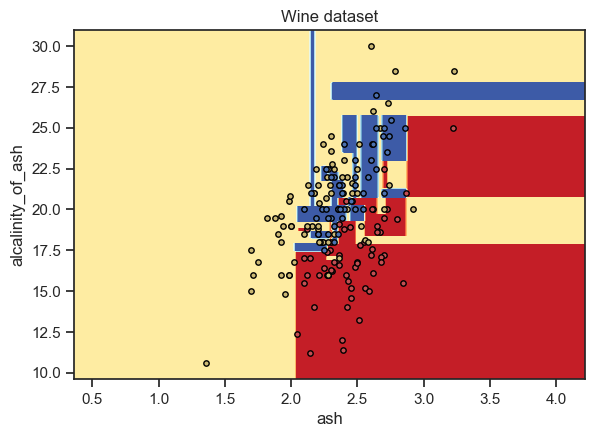

In [76]:
plot_tree_classification('Wine dataset', wine)

In [77]:
# Обучим дерево на всех признаках wine
wine_tree_cl = DecisionTreeClassifier(random_state=1)
wine_tree_cl.fit(wine_X_train, wine_y_train)
wine_tree_cl

DecisionTreeClassifier(random_state=1)

In [81]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(wine_tree_cl, feature_names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])
HTML('<pre>' + tree_rules + '</pre>')

важность признаков


In [79]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

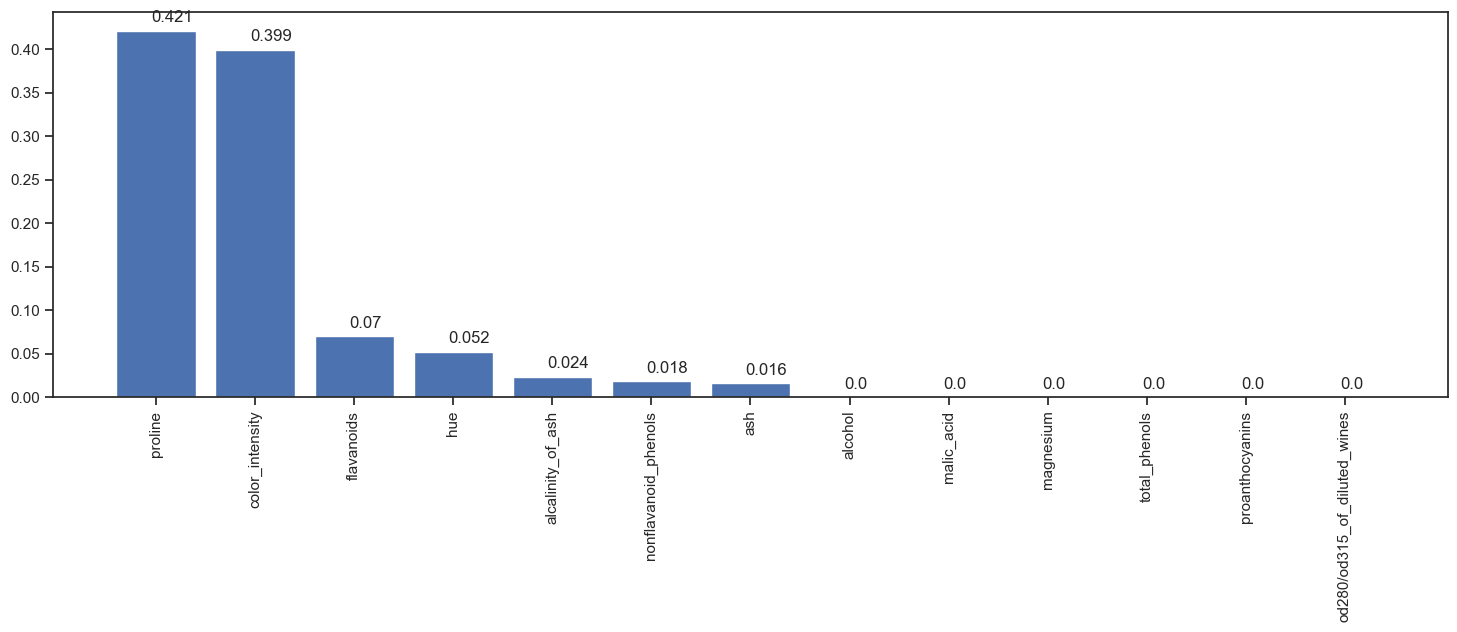

In [83]:
wine_tree_cl_fl, wine_tree_cl_fd = draw_feature_importances(wine_tree_cl, df_X)

In [84]:
wine_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(wine_X_train, wine_y_train)
wine_y_test_predict = wine_tree_cl_feat_1.predict(wine_X_test)
wine_y_test_predict.shape

(54,)

In [85]:
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict)

Метка 	 Accuracy
0 	 0.7333333333333333
1 	 0.8148148148148148
2 	 0.9166666666666666
